## 1. Init Setup

In [2]:
!pip install tensorflow opencv-python matplotlib

In [6]:
import tensorflow as tf
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [7]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 1085 files belonging to 2 classes.


In [8]:
data_iterator = data.as_numpy_iterator()

In [9]:
batch = data_iterator.next()

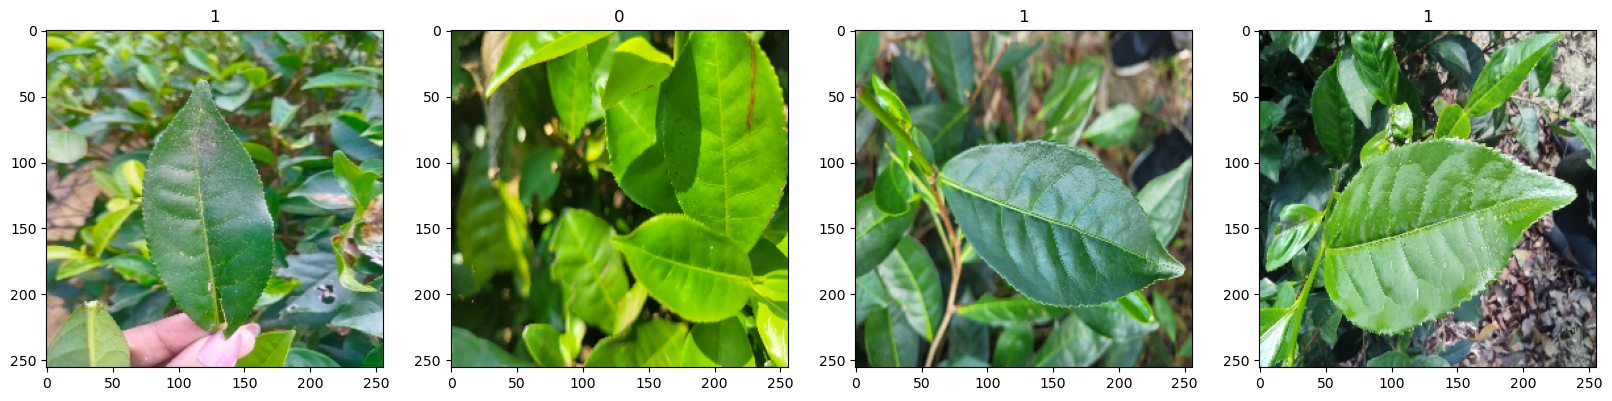

In [10]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 2. Scaling and Splitting Data

In [11]:
data = data.map(lambda x,y: (x/255, y))

In [13]:
data.as_numpy_iterator().next()

(array([[[[1.46966904e-01, 3.07751238e-01, 1.86887255e-03],
          [1.47349879e-01, 3.03354770e-01, 2.03737756e-03],
          [1.69776350e-01, 3.18795949e-01, 2.78645828e-02],
          ...,
          [1.50000006e-01, 1.49555758e-01, 2.46629901e-02],
          [5.42202830e-01, 7.01378703e-01, 1.69270840e-02],
          [2.81127453e-01, 5.63480377e-01, 0.00000000e+00]],
 
         [[1.49234071e-01, 3.06755513e-01, 3.10968142e-03],
          [1.35003060e-01, 2.91865796e-01, 6.34191185e-03],
          [1.46063119e-01, 2.84175843e-01, 1.57935042e-02],
          ...,
          [7.31158078e-01, 6.63985908e-01, 3.07276338e-01],
          [6.17018998e-01, 7.67509162e-01, 0.00000000e+00],
          [3.35768998e-01, 5.89828432e-01, 3.43903191e-02]],
 
         [[1.31479785e-01, 2.92141557e-01, 0.00000000e+00],
          [1.45419732e-01, 3.06204051e-01, 3.21691186e-04],
          [1.42386645e-01, 2.83195466e-01, 8.56311247e-03],
          ...,
          [3.34420949e-01, 4.04028803e-01, 2.4126

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train_size + val_size + test_size

32

In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## 3. Building Deep Learning Model

In [19]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

## 4. Training